# Prediction of Heart Failure        

## Introduction   

### Background

One of the most vital organs is the heart, which circulates blood throughout the body, supplying nutrition and oxygen to cells and expelling waste.The phrase "heart disease" is a general one that refers to various illnesses and ailments that affect the heart and circulatory system. These conditions are also known as cardiovascular diseases. It is a significant contributor to disability all around the world. Since the heart is one of the body's most important organs, illnesses that affect it also impact other organs and body parts. Heart disorders come in a variety of shapes and forms. The most frequent ones result in heart failure and heart attacks by narrowing or blocking coronary arteries, failing heart valves, growing the size of the heart, among other symptoms!

### Motivation

The symptoms of a heart attack in a woman are far less obvious than those in a man. Women who are having heart attacks may experience a tightening, pressure, fullness, or discomfort in the middle of their chest. Other symptoms include shortness of breath, nausea, discomfort in the back, neck, jaw, or stomach, as well as pain in one or both arms. Men have the normal heart attack symptoms, including tension, uneasiness, and chest pain. In addition, they might feel pain in their arms, neck, back, and jaw, as well as shortness of breath, perspiration, and discomfort that seems like heartburn.

Knowing which factors and how they affect our hearts is very intriguing. Some of these, such as blood pressure, age, and cholesterol, are known.


This notebook aims at creating a model using  machine learning to predict  heart failure and factors involved in influencing it.The dataset used can be found  [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?datasetId=1582403)

## Methods

In order to predict the heart attack from the given dataset,in this study,Random Forest algorithm will be used which is a supervised learning algorithm used to  handle classification,regression problems.This algorithm works by building a large number of decision trees during the training phase and then producing the class that corresponds to the mean forecast of all the individual trees.After creating decision trees,it get prediction from each tree and based on majority voting to select the best solution.
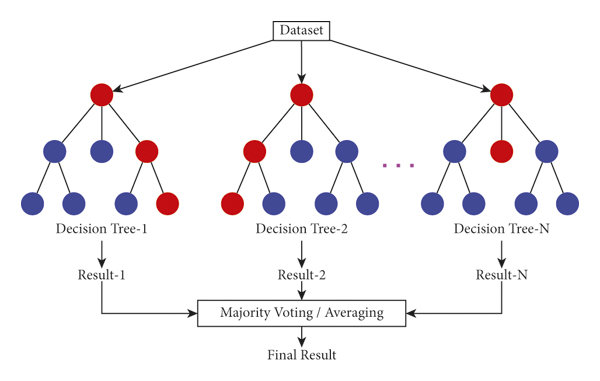

Before creating a model ,lets look into understanding the data and perform exploratory analysis on it.

###  Load the heart failure dataset


In [2]:
import pandas as pd
import numpy as np
# Load the dataset downloaded from Kaggle.
# This dataset will be used here both for training and testing our algorithms. 
heart = pd.read_csv("data\heart.csv")
# Printing the information about the heart failure dataframe
heart.info()
# Displays the dimension of the dataset
heart.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(918, 12)

The dataset contains 918 observations, 12 features and the target variable HeartDisease.

In [3]:
# looking at the first 10 records of the dataset
heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [30]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


#### The features include:

*Age*: age of the patient [years]

*Sex*: sex of the patient [M: Male, F: Female]

*ChestPainType*: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

*RestingBP*: resting blood pressure [mm Hg]

*Cholesterol*: serum cholesterol [mm/dl]

*FastingBS*: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

*RestingECG*: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

*MaxHR*: maximum heart rate achieved [Numeric value between 60 and 202]

*ExerciseAngina*: exercise-induced angina [Y: Yes, N: No]

*Oldpeak*: oldpeak = ST [Numeric value measured in depression]

*ST_Slope*: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

*HeartDisease*: output class [1: heart disease, 0: Normal]

Our study's goal variable, heart disease, is used to assess whether a person is likely to get heart disease based on inputs including gender, age, and the results of numerous tests.

### Exploratory Data Analysis (EDA)

Exploratory Data Analysis will help in understanding the data and clean up the  dataset.It helps visualize the relationship between the features and elemeninating the  less relevant variables.
Also this is important aspects in handling Missing values or human error and identifying outliers.

First,lets look into the distribution of the target variable heart disease.


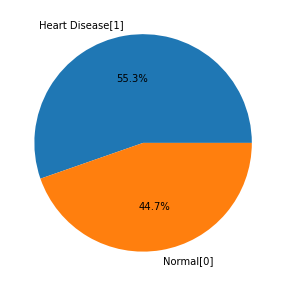

Percentage of Heart Disease: % 55.34 --> (508 cases for Heart Disease)
Percentage of Normal: % 44.66 --> (410 cases for NOT Heart Disease)


In [35]:
import plotly.express as pg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Normal and Heart Disease with target column
plt.figure(figsize=(10,5))
plt.pie(heart['HeartDisease'].value_counts(), labels=['Heart Disease[1]', 'Normal[0]'], autopct='%1.1f%%')
plt.show()

y = heart['HeartDisease']
print(f'Percentage of Heart Disease: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} cases for Heart Disease)\nPercentage of Normal: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} cases of normal)')

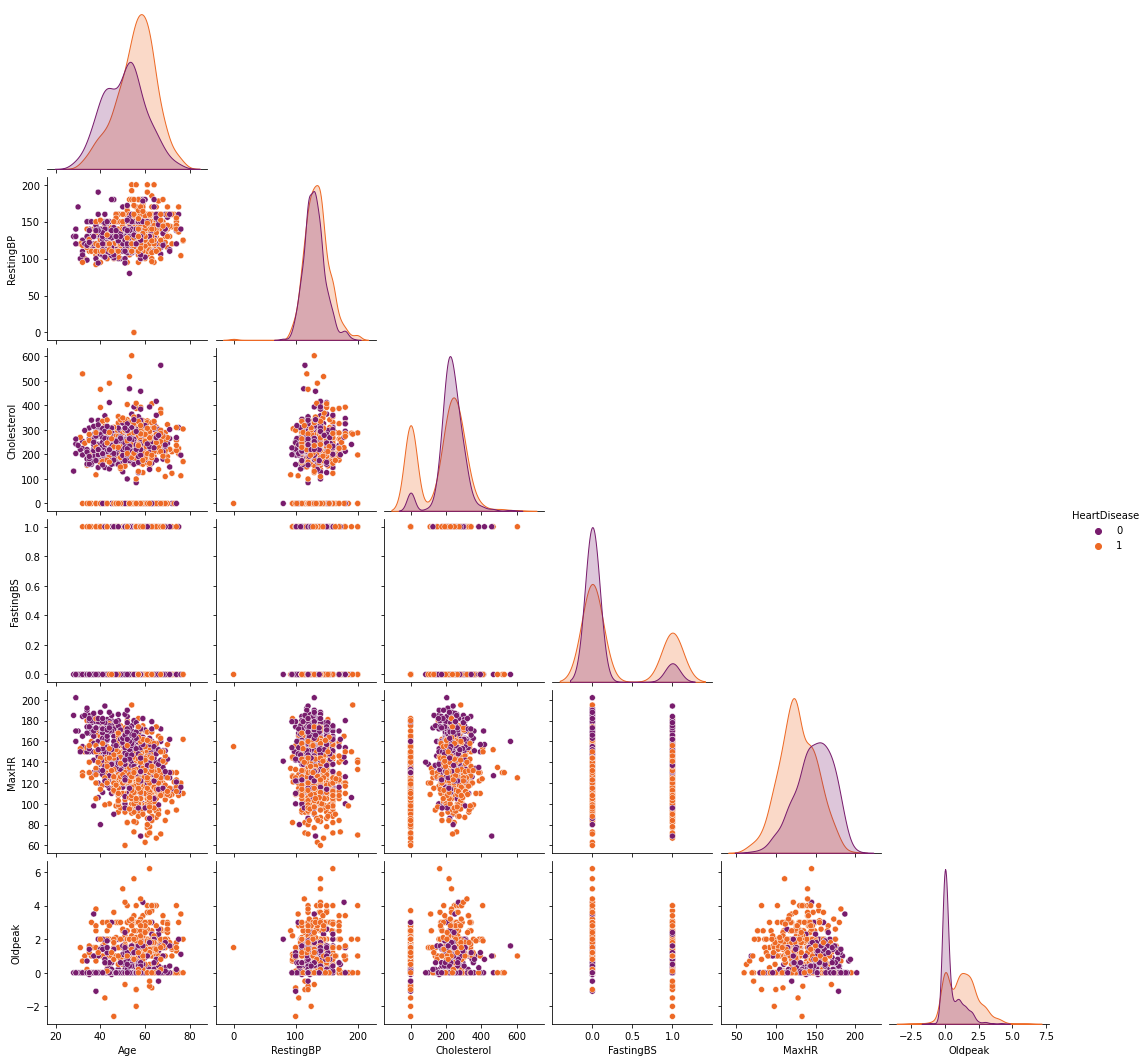

In [33]:
# pairplot used to look into the relationship of the variables
sns.pairplot(heart, hue="HeartDisease", palette="inferno", corner=True);


### Highlights
There is a weak negative correlation between Age and MAxHR. As the age increases the maximum heart rate decreases.

Patients having heart disease are little older

From Age vs. Oldpeak graph, most of the people having heart disease have high  depression

Now,Looking into the frequency of the categorical variables.

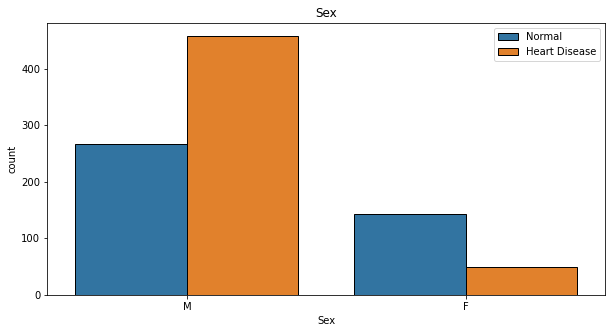

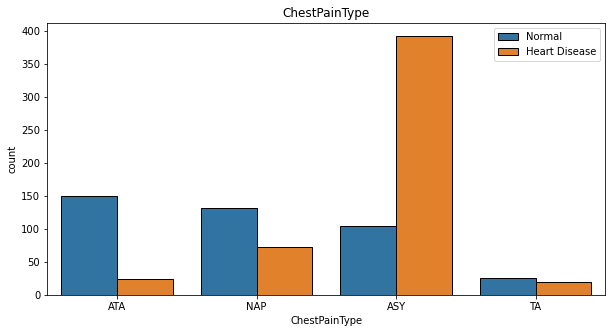

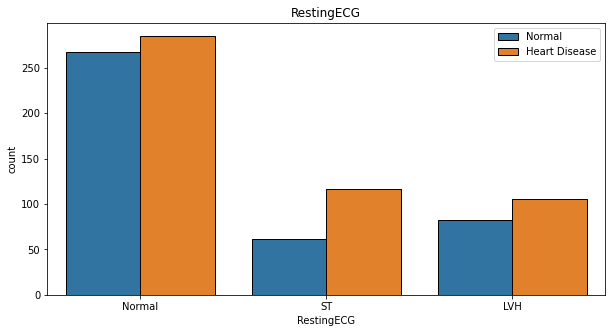

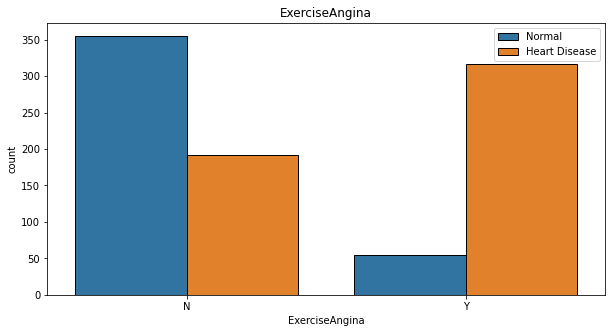

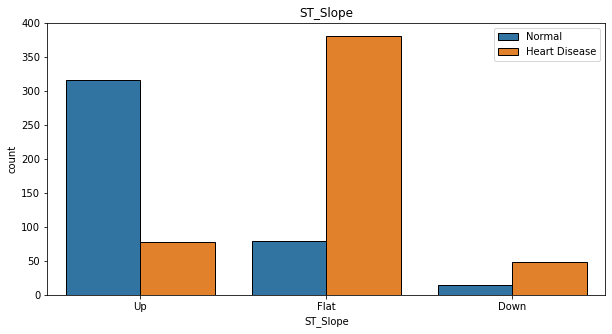

In [38]:
#ploting categorical features with target
for i in categorical_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=heart, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

### Distribution Graph

Next we will check the linearity of the variables and  we plot the distribution graph and look for skewness of feature using  Kernel density estimate (kde)  tool for plotting the shape of a distribution.

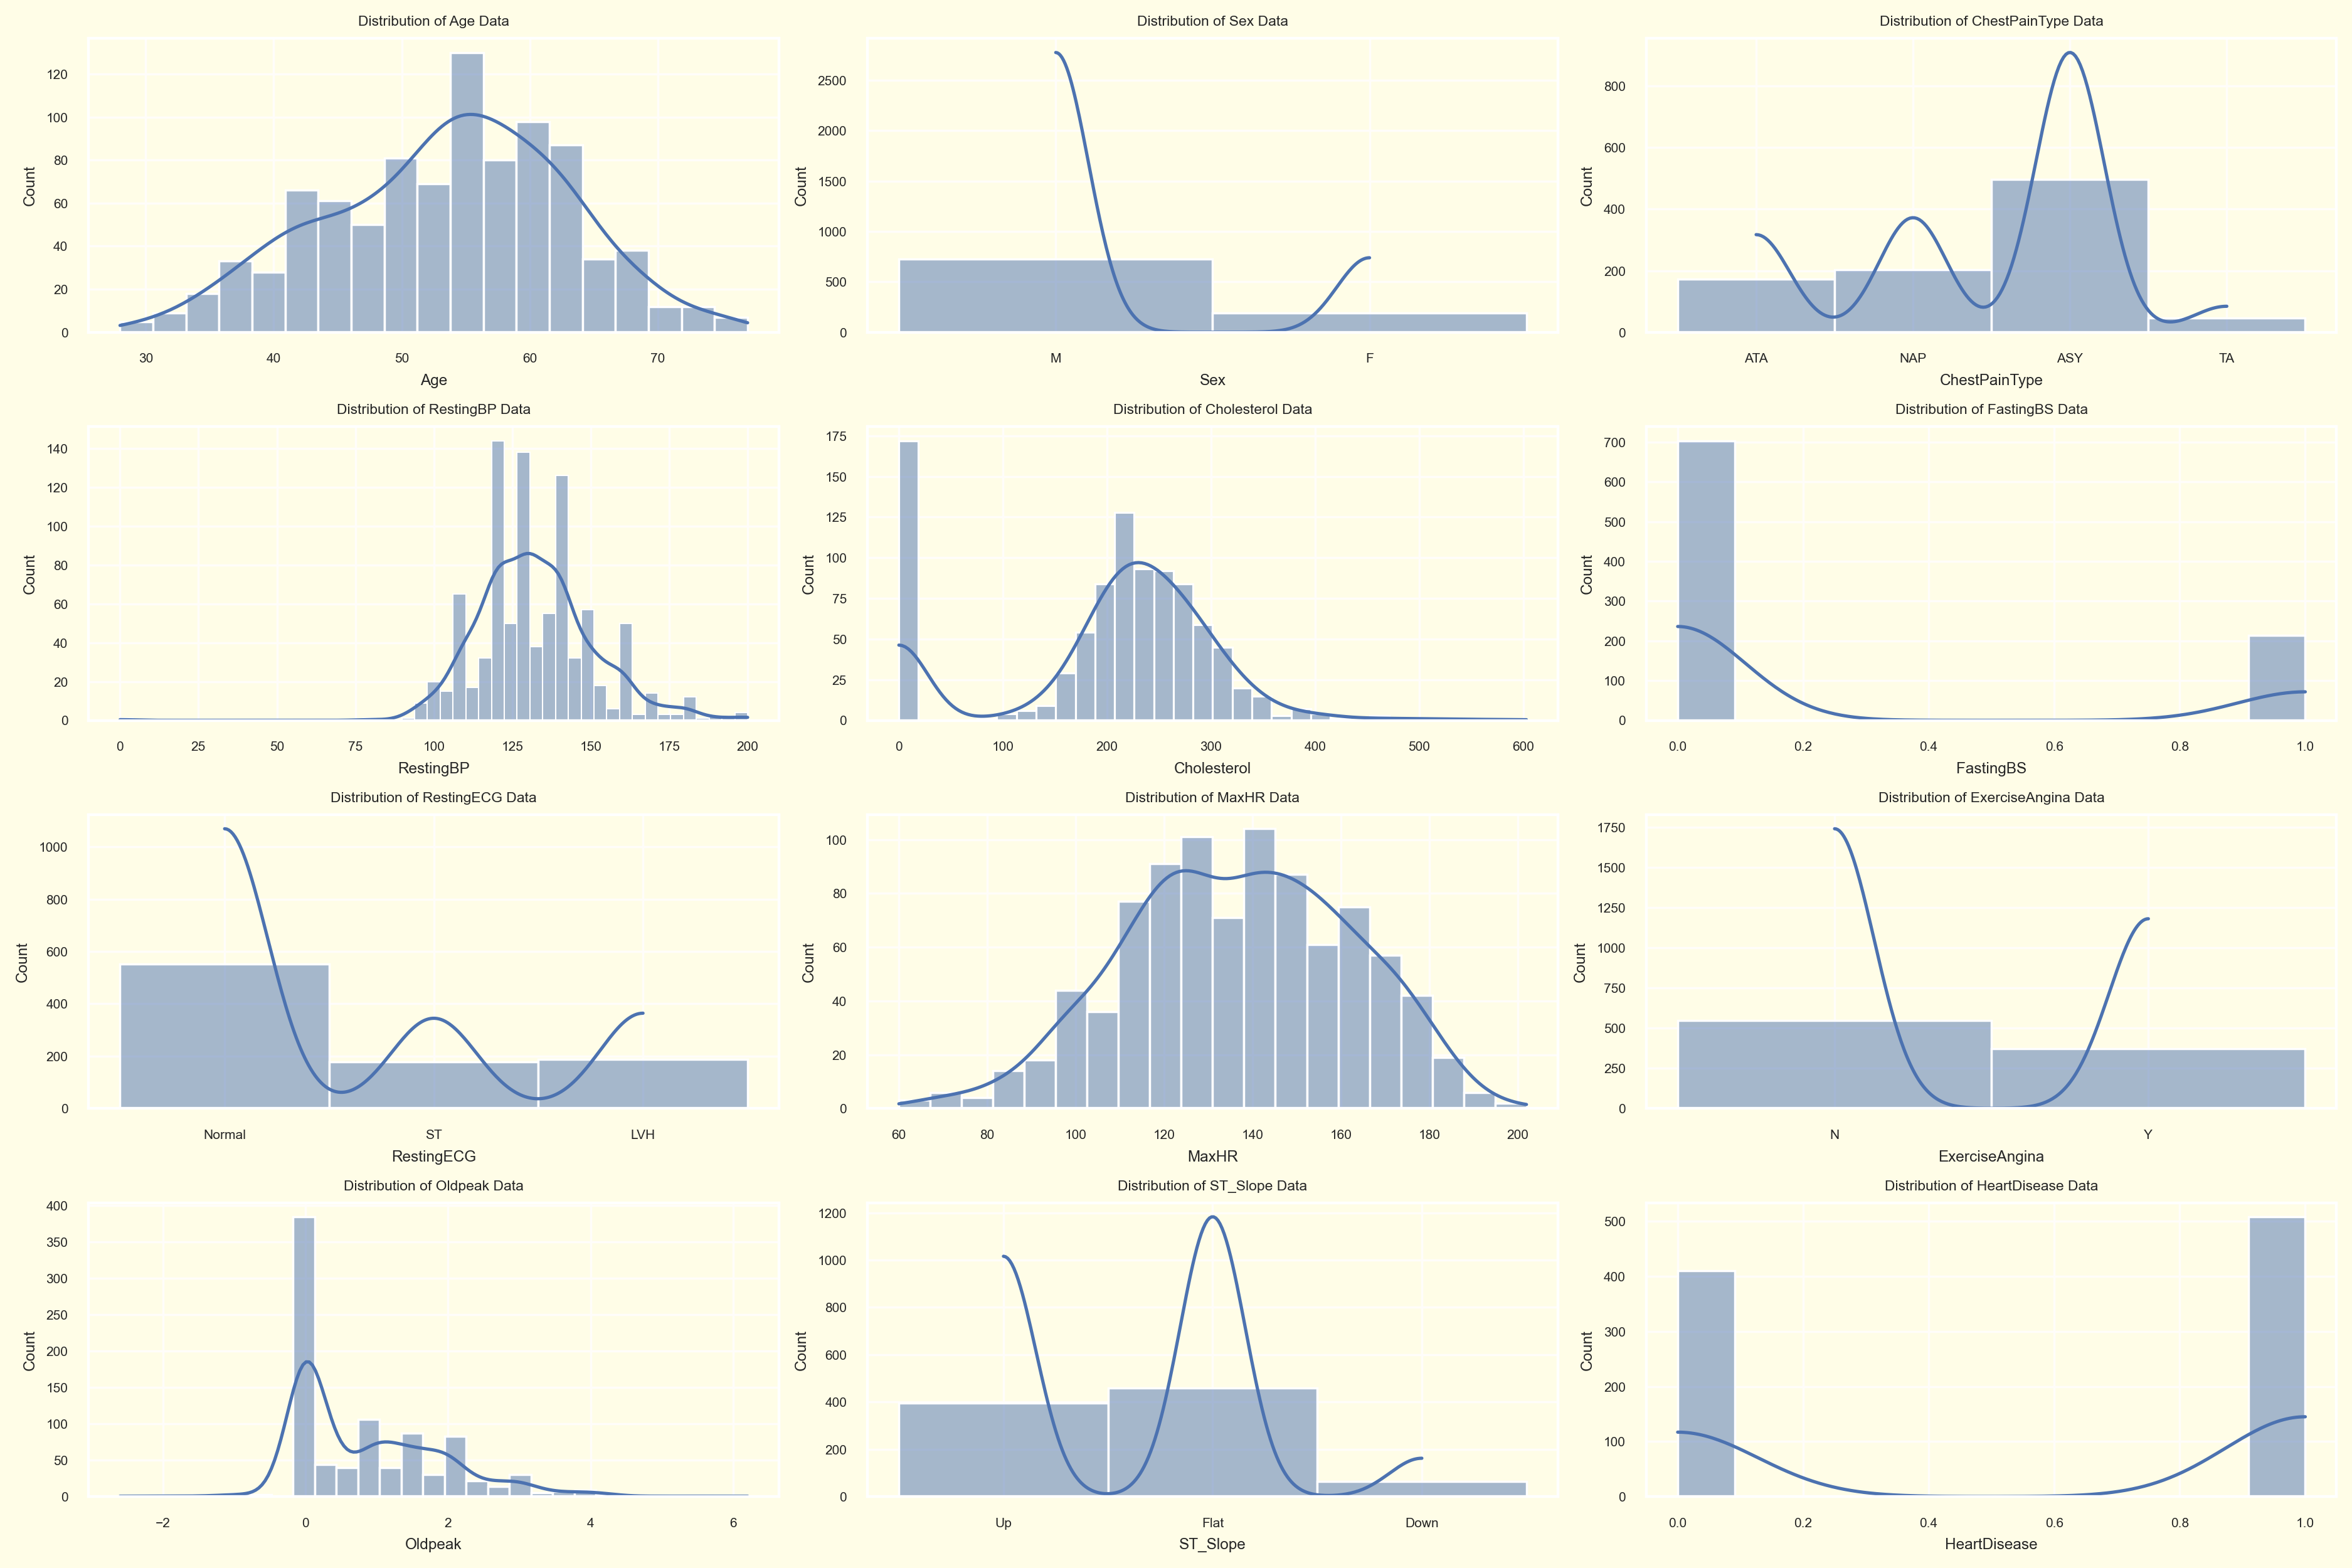

In [115]:
plt.figure(figsize=(15,10))
for i,col in enumerate(heart.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart[col],kde=True)
    plt.tight_layout()
    plt.plot()

### Correlation Matrix
A correlation heatmap shows the strength of correlations between numerical variables. To determine which variables are related to one another and how strongly they are associated, correlation graphs are utilised.

<AxesSubplot:>

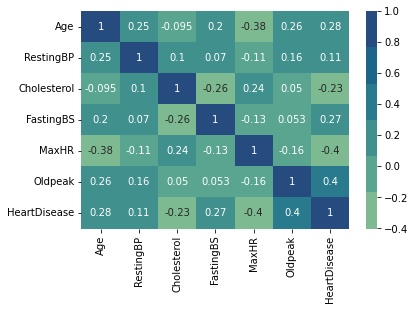

In [18]:
colormap = sns.color_palette("crest")
heart_correlation = heart[heart.columns].corr()
sns.heatmap(heart_correlation, annot=True, cmap=colormap)

From the correaltion  we can see Heart Disease has positive correatlation with "Oldpeak","FastingBS" and "RestingBP" , where as here  a high negative correlation with "MaxHR" and slight negative correlation with "Cholesterol".The issue of muticolinearity does not exists amongst the features.

### Feature Engineering

### Missing Values

In [21]:
# missing values?
print('Number of Missing Values:', heart.isnull().sum().sum())

Number of Missing Values: 0


There are no missing values in the dataset.

### Feature scaling and label encoding

The dataset has two types of data types numeric and categorical.The numeric features will be scaled for better visibilty of the outliers by performing normalization in which the values are rescaled to between 0 and 1,also known as Min-Max scaling and the categorical values will be label encoded to convert to numeric.Below are the methods that perform the scaling for numeric feature and label encoding for categorical features.


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Methods to scale the numeric and categorical features
class ConvertFeatures:
    def __init__(self, dataframe, features):
        self.dataframe = dataframe
        self.features = features
    # Convert Categorical Values into Numeric Values    
    def convert_cat(self):
        le = LabelEncoder()
        for feature in self.features:
            self.dataframe[feature] = le.fit_transform(self.dataframe[feature])
        
        return self.dataframe
    #scale numeric features
    def convert_numeric(self):
        for feature in self.features:
            self.dataframe[feature] =MinMaxScaler().fit_transform(self.dataframe[[feature]])      
        return self.dataframe

In [10]:
# get the numeric features
num_feats = heart.select_dtypes(exclude=object)
scaled_df=heart
scaled_df = ConvertFeatures(heart, num_feats)
#scale the numeric feature
scaled_df = scaled_df.convert_numeric()

### Outliers
Using the boxplot ,we would observe the outliers because box-plot shows the distribution of quantitative data comparing the variables.

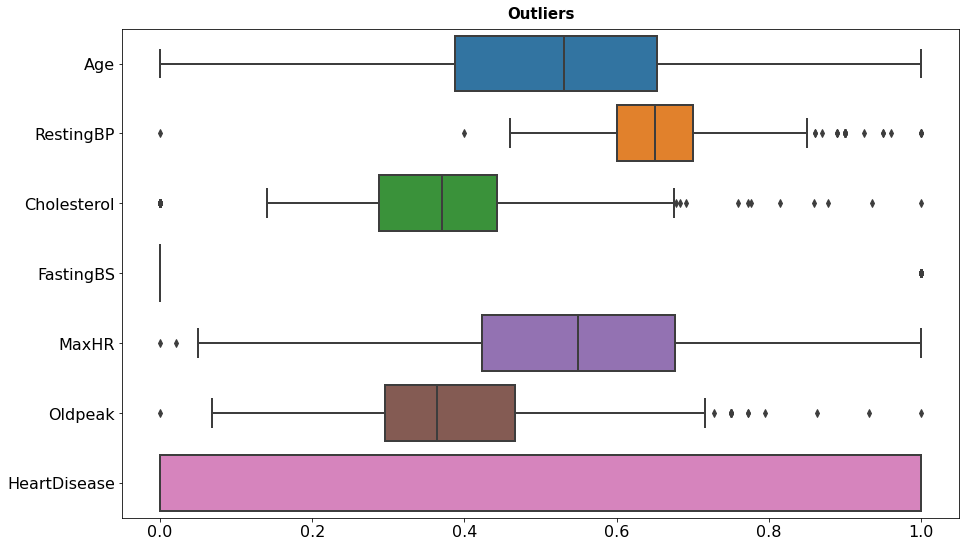

In [24]:
# box-plot creation
fig, axis = plt.subplots(figsize =(15,9))
sns.boxplot(data = scaled_df, ax=axis, orient="h", linewidth=2);
# Change font axis
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
# Set title
axis.set_title('Outliers', fontsize=15, fontweight="bold", pad=10);

In [11]:
# removing RestingBP=0 record as it is not possible for someone's BP to be 0
scaled_df = scaled_df.drop(scaled_df[(scaled_df['RestingBP'] == 0)].index)

In [12]:
#Methods to identify and handle the outliers
class Outliers:
    def __init__(self, dataframe, features):
        self.dataframe = dataframe
        self.columns = features
    # Method to replace the outliers with median imputation      
    def replace_outliers(self):               
        for col in self.columns:
            Q1 = self.dataframe[col].quantile(0.25)
            Q3 = self.dataframe[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - (1.5 * IQR)
            upper_bound = Q3 + (1.5 * IQR)
             # Median imputation (RestingBP)
            med = np.median(self.dataframe[col])
            for val in self.dataframe[col]:
                    #handle cholestrol feature in different manner
                    if col!='Cholesterol':
                        if val > upper_bound or val < lower_bound:
                            self.dataframe[col] =  self.dataframe[col].replace(val, med)
                    else:
                        if val > upper_bound:
                            self.dataframe[col] =  self.dataframe[col].replace(val, med)
                
            return self.dataframe
     #Method to get the count of the outliers for heartdisease   
    def get_outliers_count(self):
        for col in self.columns:
            Q1 = self.dataframe[col].quantile(0.25)
            Q3 = self.dataframe[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - (1.5 * IQR)
            upper_bound = Q3 + (1.5 * IQR)
            
            data=self.dataframe[(self.dataframe[col] >= upper_bound) | (self.dataframe[col] <= lower_bound)]
            data = pd.DataFrame(data)
            print('Outliers on '+ col + ': ')
            print(data.value_counts(data['HeartDisease']))
        

In [13]:
# get the ouliers count for each feature
data = Outliers(scaled_df, ('RestingBP','MaxHR', 'Oldpeak','Cholesterol'))
data.get_outliers_count()

#Check for Cholesterol=0
chol = scaled_df[scaled_df['Cholesterol'] == 0]
chol= pd.DataFrame(chol)
print('Outliers on Cholesterol equal to 0:')
print(chol.value_counts(scaled_df['HeartDisease']))

#replace the outliers
data = Outliers(scaled_df, ('RestingBP','Cholesterol'))
cleaned_data = data.replace_outliers()


Outliers on RestingBP: 
HeartDisease
1.0    17
0.0    10
dtype: int64
Outliers on MaxHR: 
HeartDisease
1.0    2
dtype: int64
Outliers on Oldpeak: 
HeartDisease
1.0    15
0.0     1
dtype: int64
Outliers on Cholesterol: 
HeartDisease
1.0    158
0.0     25
dtype: int64
Outliers on Cholesterol equal to 0:
HeartDisease
1.0    151
0.0     20
dtype: int64


### Handling the outliers

1. **RestingBP :** Since the outliers are not highly imbalanced on HeartDisease,the median imputation can be used to remove the outliers from this feature.There is a value of RestingBP=0 in the dataset and this is removed as it is impossible for someone's BP to be 0.
2. **Cholesterol :** As it can be seen that majority of the patients with colesterol equal 0 do suffer from heart disease. For this reason, outliers equal to 0 will be skipped while removing the outliers in this feature.
3. **MaxHR :** There are only 2 outliers, so thi can be ignored
4. **Oldpeak :** Majority of this outlier do have heartdisease,so this can be skipped.

In [17]:
cat_feats = heart.select_dtypes(include=object)

scaled_df = ConvertFeatures(scaled_df, cat_feats)
scaled_df = scaled_df.convert_cat()

## Modelling

In [19]:
scaled_features = MinMaxScaler().fit_transform(cleaned_data.drop('HeartDisease', axis=1))
df_features = pd.DataFrame(scaled_features, columns=cleaned_data.columns[:-1])

### Split Train and Test Data
The next step is to split the given dataset into training and testing datasets so that later we can use the testing data to evaluate the model’s performance.We have assigned 80% of the data to the training part and only 20% to the testing part.

In [41]:
from sklearn.model_selection import train_test_split
x = df_features
y = cleaned_data[cleaned_data.columns[-1]]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=2, stratify=y)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
forest = RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='auto',criterion='gini',max_depth=None,random_state=2,oob_score=True)
forest.fit(xtrain, ytrain)
y_train_pred = forest.predict(xtrain)
y_test_pred = forest.predict(xtest)

# Results

In [51]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print("Accuracy on training set:",round(metrics.accuracy_score(ytrain, y_train_pred),2))
print("Accuracy on test set:",round(metrics.accuracy_score(ytest, y_test_pred),2))
print("OOB score:",round(forest.oob_score_,2)) 

Accuracy on training set: 1.0
Accuracy on test set: 0.91
OOB score: 0.86


### Confusion Matrix

A confusion matrix is a means to show how many predictions made by a classifier were accurate and where, exactly, they went wrong. The rows in the confusion matrices below correspond to the actual labels, while the columns to the predicted labels. Values on the diagonal show how often (or how much, in a normalised confusion matrix) the predicted label coincides with the actual label.The values in the other cells show cases where the classifier incorrectly identified an observation; the row and column values indicate the correct label in each case. This is an easy technique to identify regions where the model can benefit from additional training.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

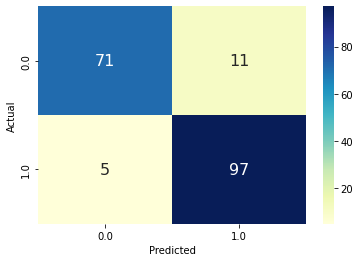

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest,y_test_pred)
df_cm = pd.DataFrame(cm, columns=np.unique(ytest), index = np.unique(ytest))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm,cmap="YlGnBu", annot=True,annot_kws={"size": 16})

**Observations** 

True Positives - There are 71 TP, it means the model has correctly identified 71 people who are not having heart disease

True Negative - There are 97 TN, it means the model has correctly identified 97 people  having heart disease

False Positives - There are 11 FP, it means the model has incorrectly identified 11 as normal  who were actually  having heart disease.

False Negative - There are 5 FN, it means the model has incorrectly identified 5 people as having heart disease who were actually not having it

The TP and TN should be as high as possible and FP and FN should be as low as possible

### Classification Report
Examining additional measures like precision, recall, and F1 score will provide us with even more information about the performance of the model. 

Precision is the product of the number of members of a class that were properly recognised and the total number of times the class was predicted by the model.

Recall is the proportion of a class's members that the classifier successfully identified out of all the class's members.

Because F1 score combines precision and recall into one statistic, it is a little less obvious. F1 will be high if precision and recall are both high. 

In [26]:
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(ytest, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89        82
         1.0       0.90      0.94      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.91       184
weighted avg       0.91      0.91      0.91       184



### Feature Importance
Determining the feature importance based on the random forest model prediction.

In [28]:
importance = forest.feature_importances_
importance_feats = xtrain.columns
_importance = pd.DataFrame({'Feature':importance_feats, 'Percentage':importance})
rf_importance = pd.DataFrame({'Feature':importance_feats, 'Percentage':importance})
rf_importance.sort_values('Percentage', ascending=False, inplace=True)
rf_importance.Percentage = rf_importance.Percentage.apply(lambda x: x * 100)

In [40]:
df_importance

,Feature,Percentage
10,ST_Slope,20.159232
4,Cholesterol,12.110818
2,ChestPainType,11.968534
7,MaxHR,11.912818
9,Oldpeak,10.766858
8,ExerciseAngina,8.580568
0,Age,8.295575
3,RestingBP,7.634295
1,Sex,3.323625
6,RestingECG,2.952180


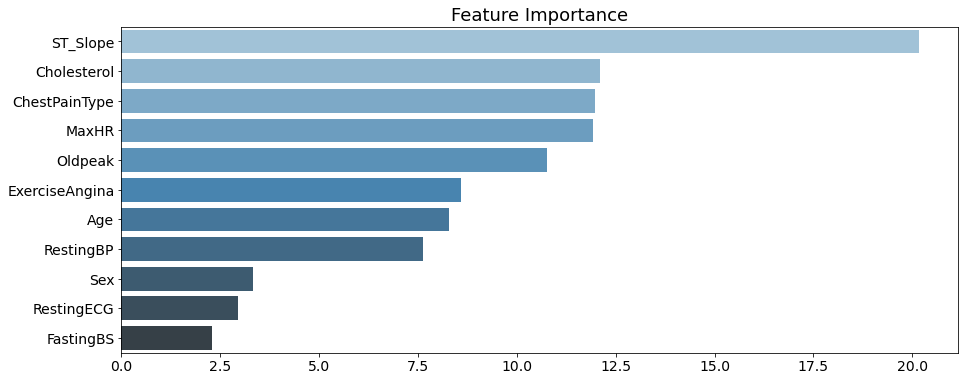

In [49]:
plt.figure(figsize=(15,6))
sns.barplot(x='Percentage', y='Feature', data=df_importance,palette="Blues_d")

plt.title('Feature Importance', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')

plt.show()

# Conclusion


1. With an accuracy of 91%, the Random Forest model could forecast heart disease. 

2. The prediction's largest contributor is ST Slope. While the flat slope of the peak workout ST segment pushes the model output to cardiac disease, high ST Slope values (upsloping) drive the prediction to class 0 (Normal).

3. Males are more prone than females to have cardiac disease. 

4. Heart disease is more common in those with ASYM Chest Pain Type.

5. Heart disease is more common in people with high oldpeak. 

6. The likelihood of developing heart disease increases with the intensity of exercise angina. 
7. Heart disease is not specifically dependent cholesterol level because even at cholestrol=0, people tend to get heart disease..

## References

1. For attribute description and dataset : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction